# **About: Text/Comment classification using NLP**

### **Veracity Factor**: Toxicity
### **Micro Factor**: Severe toxicity, Obscene, Threat, Insult, Identity attack

## **Approach**
1. Feature Engineering
2. Data pre-processing
3. Size of the dataset and number of classes
4. Number of samples per class - useful to check potential class imbalance
5. Number of words per sample - helps understand if context capabilities may be required i.e. for long sentences meaning may fade or become more complex with increased size
6. Distribution of words per class - helps unveil which words/tokens are informative to class membership
7. Word cloud - visualization of top N most common tokens per class
8. NLP
    * Cleaning document
    * Word Tokenization
    * Stemming
    * Count Vectorizer
    * TF-IDF Vectorizer
9. Splitting dataset into traning and testing
10. Multilabel Classification
    * Multilabelbinarizer - allows you to encode multiple labels per instance
    * Classifiers
        * LogisticRegression
        * KNeighborsClassifier
        * MultinomialNB
        * LinearSVC
        * RandomForestClassifier
        * XGBClassifier
11. Validation/Testing
    * Accuracy
    * F1 Score
    * Precision
    * Recall



### **Tech Articles**
1. https://arxiv.org/pdf/2108.01062.pdf -- article use for implement factor
2. https://scholar.smu.edu/cgi/viewcontent.cgi?article=1134&context=datasciencereview -- article use for implement factor
3. https://hpi.de/fileadmin/user_upload/fachgebiete/naumann/publications/PDFs/2020_risch_toxic.pdf -- article use for identify micro factors


### **Scientific Article**
1. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0228723 -- article use for identify micro factors (Severe toxicity, Obscene, Threat, Insult, Identity attack)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
zf = zipfile.ZipFile("/content/drive/MyDrive/datasets/toxicity/train.zip")
data_raw = pd.read_csv(zf.open("train.csv"))
# data_raw = data_raw.head(50000)
data_raw = data_raw[["id", "comment_text", "target", "severe_toxicity", "obscene", "threat", "insult", "identity_attack"]]

In [ ]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
data_raw.head()

Number of rows in data = 1804874
Number of columns in data = 8




,id,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.0,0.00000,0.000000
1,59849,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.0,0.00000,0.000000
2,59852,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.0,0.00000,0.000000
3,59855,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.0,0.00000,0.000000
4,59856,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.0,0.87234,0.021277


### **Checking for missing values**

In [ ]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id                 0
comment_text       0
target             0
severe_toxicity    0
obscene            0
threat             0
insult             0
identity_attack    0
dtype: int64


### **Calculating number of comments under each label**

In [ ]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:7].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  1804874
Number of clean comments =  1251104
Number of comments with labels = 553770


In [ ]:
data_raw["severe_toxicity"].sum()

8270.110972216164

In [ ]:
# categories = list(data_raw.columns.values)
categories = ["severe_toxicity", "obscene", "threat", "insult", "identity_attack"]
print(categories)

['severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']


In [ ]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, int(data_raw[category].sum()))) #.apply(lambda x: int(x)).sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,severe_toxicity,8270
1,obscene,25046
2,threat,16805
3,insult,146470
4,identity_attack,40854


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


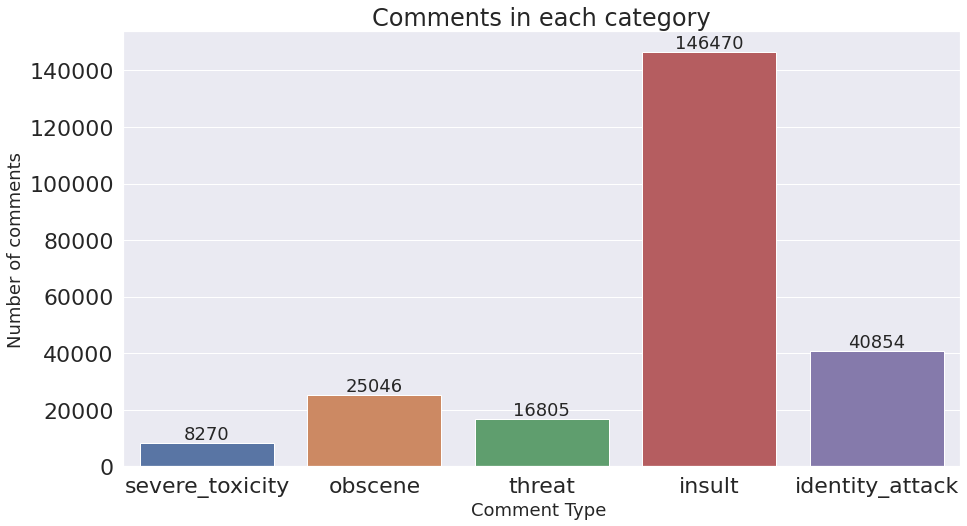

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

v = [int(data_raw[category].sum()) for category in categories]
ax = sns.barplot(categories, v)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = v
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

### **WordCloud representation of most used words in each category of comments**

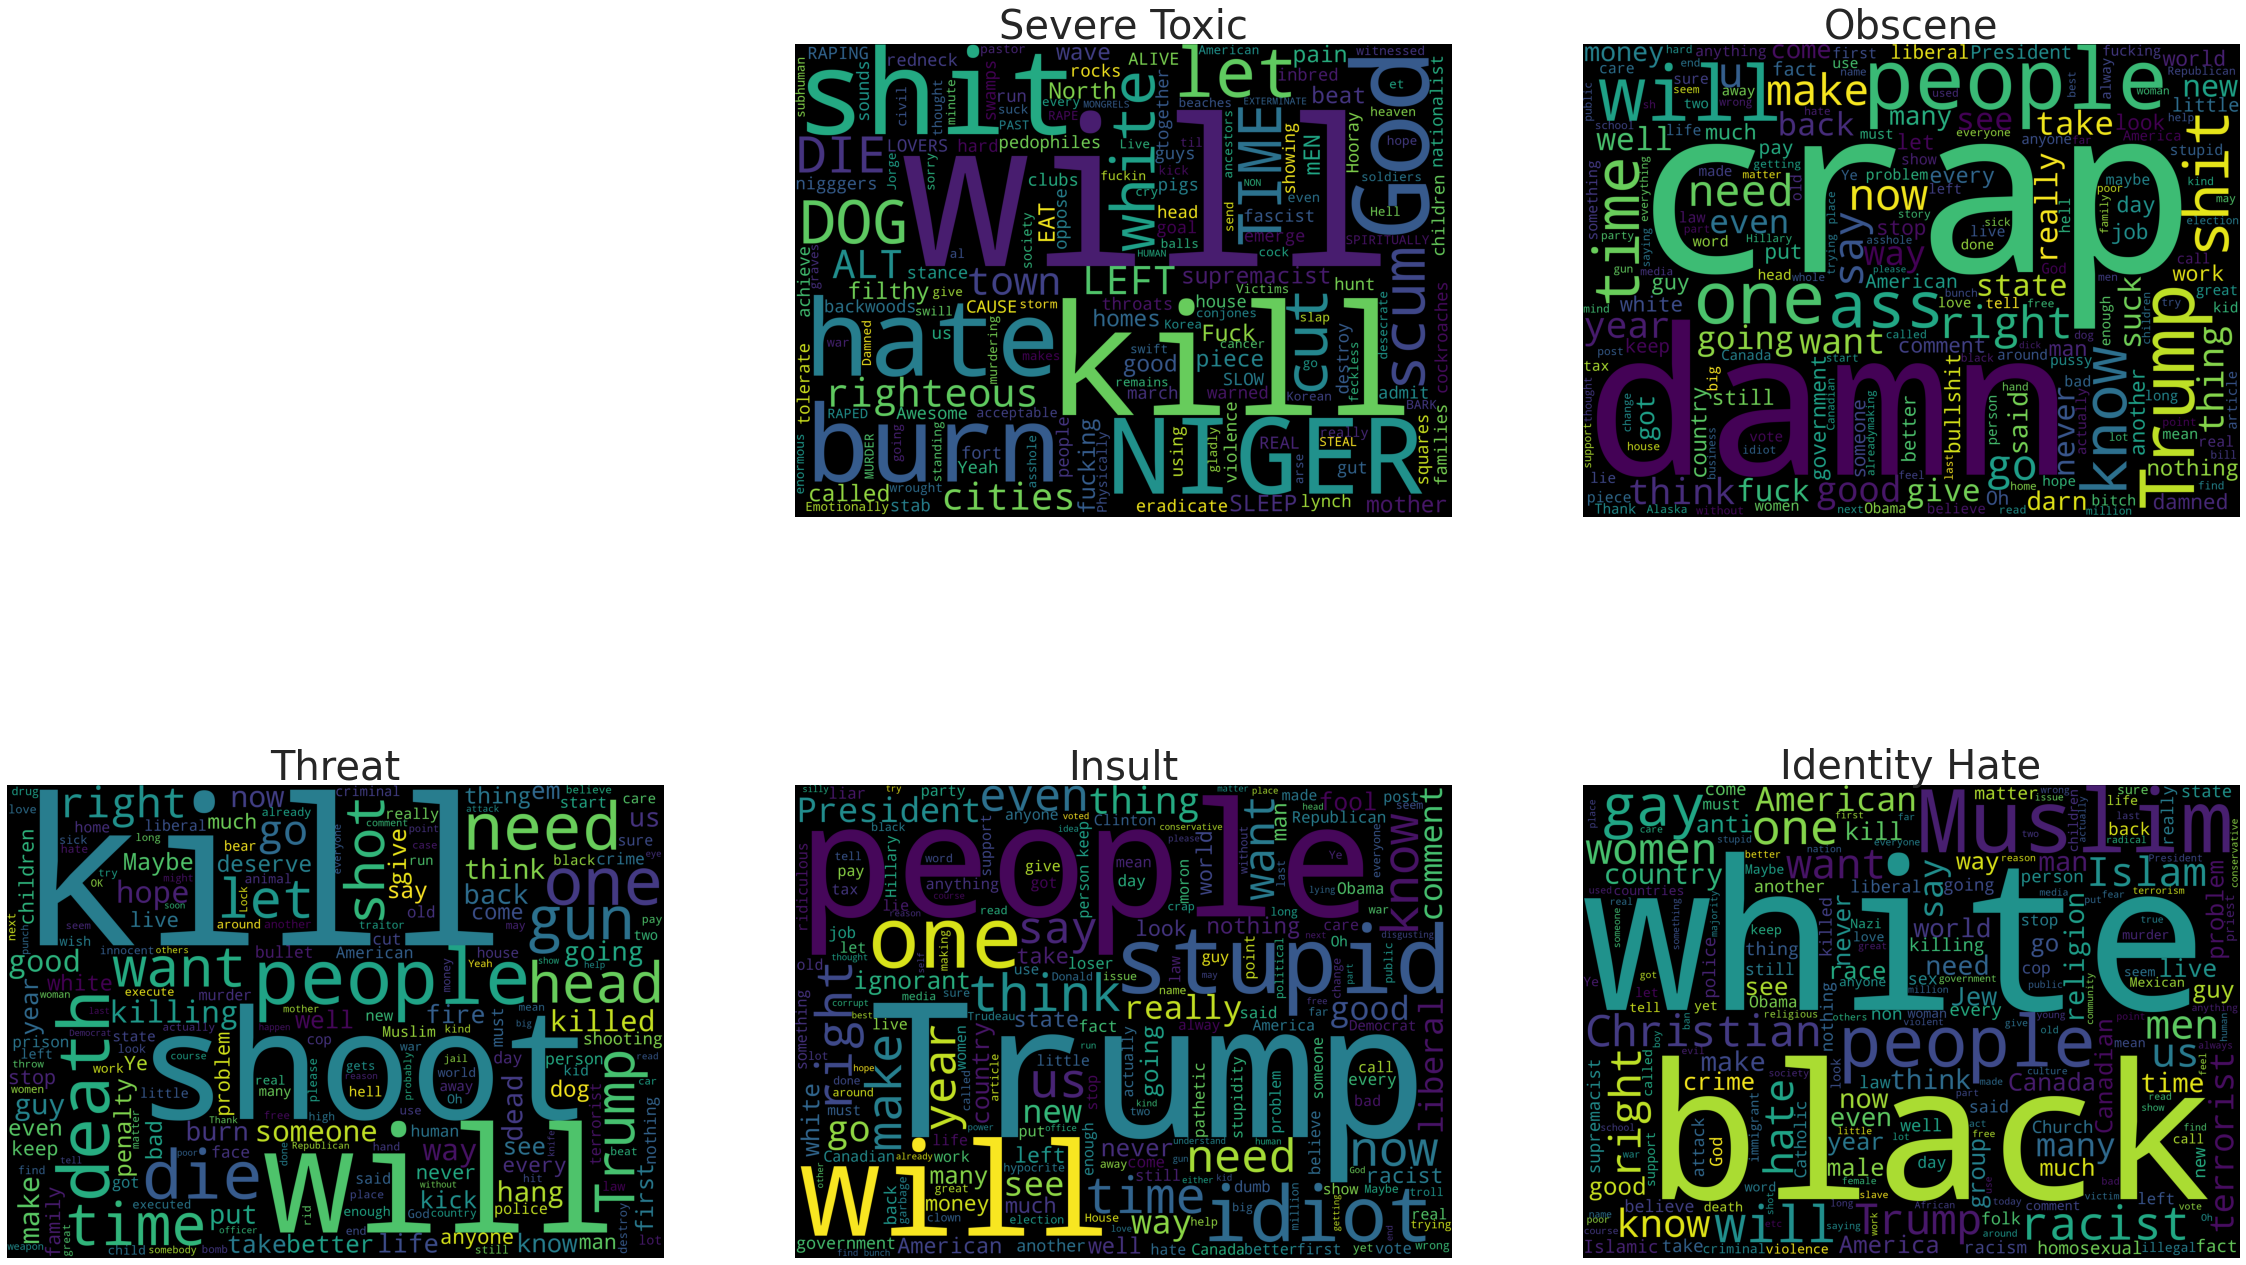

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# severe_toxic
subset = data_raw[data_raw.severe_toxicity>0.5]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = data_raw[data_raw.obscene>0.5]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat>0.5]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult>0.5]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_attack>0.5]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

## **Data Pre-Processing**

In [ ]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### **Cleaning Data**

In [ ]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [ ]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack
342497,662568,us law says that certain classes of people can...,0.0,0.0,0.0,0.0,0.0,0.000000
989121,5327533,that is what trudeau sr did during the s and ...,0.0,0.0,0.0,0.0,0.0,0.000000
570879,940844,fair enough clearly i missed your intent,0.0,0.0,0.0,0.0,0.0,0.000000
1626676,6114521,justins plan is just a page out of the old com...,0.0,0.0,0.0,0.0,0.0,0.166667
23731,271036,bernie and ted seems to be out front i guess d...,0.4,0.0,0.0,0.0,0.3,0.100000


### **Removing Stop Words**

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack
342497,662568,us law says certain classes people cannot d...,0.0,0.0,0.0,0.0,0.0,0.000000
989121,5327533,trudeau sr result soaring inflation...,0.0,0.0,0.0,0.0,0.0,0.000000
570879,940844,fair enough clearly missed intent,0.0,0.0,0.0,0.0,0.0,0.000000
1626676,6114521,justins plan page old communist handbook...,0.0,0.0,0.0,0.0,0.0,0.166667
23731,271036,bernie ted seems front guess donald done...,0.4,0.0,0.0,0.0,0.3,0.100000


### **Stemming**

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack
342497,662568,us law say certain class peopl cannot discrimi...,0.0,0.0,0.0,0.0,0.0,0.000000
989121,5327533,trudeau sr result soar inflat soar unemploy cr...,0.0,0.0,0.0,0.0,0.0,0.000000
570879,940844,fair enough clear miss intent,0.0,0.0,0.0,0.0,0.0,0.000000
1626676,6114521,justin plan page old communist handbook admit ...,0.0,0.0,0.0,0.0,0.0,0.166667
23731,271036,berni ted seem front guess donald done job ted...,0.4,0.0,0.0,0.0,0.3,0.100000


In [ ]:
def tag_comment(row):
    tags = []
    for category in ["severe_toxicity", "obscene", "threat", "insult", "indentity_attack"]:
        if category in row and row[category] > 0.5:
            tags.append(category)
    return tags if tags else ["neutral"]

data["tags"] = data.apply(lambda x: tag_comment(x), axis=1)
data.head()

,id,comment_text,target,severe_toxicity,obscene,threat,insult,identity_attack,tags
342497,662568,us law say certain class peopl cannot discrimi...,0.0,0.0,0.0,0.0,0.0,0.000000,[neutral]
989121,5327533,trudeau sr result soar inflat soar unemploy cr...,0.0,0.0,0.0,0.0,0.0,0.000000,[neutral]
570879,940844,fair enough clear miss intent,0.0,0.0,0.0,0.0,0.0,0.000000,[neutral]
1626676,6114521,justin plan page old communist handbook admit ...,0.0,0.0,0.0,0.0,0.0,0.166667,[neutral]
23731,271036,berni ted seem front guess donald done job ted...,0.4,0.0,0.0,0.0,0.3,0.100000,[neutral]


### Multilabelbinarizer allows you to encode multiple labels per instance

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data["tags"])
Y = multilabel_binarizer.transform(data["tags"])

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data.comment_text)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

### **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, Y, random_state=42, test_size=0.30, shuffle=True)

In [ ]:
# Import ML algos
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve


## **Multi-Label Classification**

In [ ]:
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=6, tol=None)
lr = LogisticRegression()
mn = MultinomialNB()
knn = KNeighborsClassifier(n_neighbors=5)
xgb = XGBClassifier()
svm_model = LinearSVC()
randomforest = RandomForestClassifier(n_estimators=25, random_state=42)

for classifier in [sgd, lr, mn, knn, xgb, svm_model, randomforest]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train_tfidf, y_train_tfidf)
    y_pred = clf.predict(x_test_tfidf)
    s = f"name: {str(classifier)}, accuracy: {accuracy_score(y_test_tfidf, y_pred)}, F1 score: {f1_score(y_pred, y_test_tfidf, average='micro')}, Precision Score : {precision_score(y_test_tfidf, y_pred, pos_label='positive', average='micro')}, Recall Score : {recall_score(y_test_tfidf, y_pred, pos_label='positive', average='micro')}\n"
    print(s)
    # print("F1 score:" , f1_score(y_pred, y_test_tfidf, average="micro"))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


name: SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=6,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False), accuracy: 0.9616666666666667, F1 score: 0.9584717607973422, Precision Score : 0.9616666666666667, Recall Score : 0.9552980132450332

name: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), accuracy: 0.9616666666666667, F1 score: 0.9584717607973422, Precision Score : 0.9616666666666667, Recall Score

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


name: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), accuracy: 0.9633333333333334, F1 score: 0.9601328903654486, Precision Score : 0.9633333333333334, Recall Score : 0.956953642384106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


name: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), accuracy: 0.965, F1 score: 0.9617940199335547, Precision Score : 0.965, Recall Score : 0.9586092715231788

name: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0), accuracy: 0.9616666666666667, F1 score: 0.9584717607973422, Precision Score : 0.9616666666666667, Recall Score : 0.9552980132450332

name: RandomForestClassifier(bootstrap=True, c

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
